Hippocampus heliopolis (2).svg

Hippocampus heliopolis.svg

Hippocampus heliopolis (1).svg

Hippocampus heliopolis (3).svg

In [ ]:
# data download and library installation
# Generic object decoding data
!wget -O data.h5 https://ndownloader.figshare.com/files/15049646
# Generic object decoding features
!wget -O features.h5 https://ndownloader.figshare.com/files/15015971
# Download ImageNet labels
!wget -O imagenet_classes.txt https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

!pip install bdpy
!pip install seaborn_image

In [ ]:
import bdpy
from bdpy.util import get_refdata
import numpy as np
import pandas as pd
import seaborn_image as isns
import seaborn as sns
import ipywidgets as widgets  # interactive display
import matplotlib.pyplot as plt
from random import seed
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
import urllib
from PIL import Image
from torchvision import transforms
import torch

In [ ]:
#Brain Regions

rois = {'VC' : 'ROI_VC = 1',
        'LVC' : 'ROI_LVC = 1',
        'HVC' : 'ROI_HVC = 1',
        'V1' : 'ROI_V1 = 1',
        'V2' : 'ROI_V2 = 1',
        'V3' : 'ROI_V3 = 1',
        'V4' : 'ROI_V4 = 1',
        'LOC' : 'ROI_LOC = 1',
        'FFA' : 'ROI_FFA = 1',
        'PPA' : 'ROI_PPA = 1'}

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32 #range of a 32-bit integer
    np.random.seed(worker_id)
    seed(worker_id)

In [ ]:
# Get data of images from the GOD dataset
filename = 'data.h5'
voxel_data = bdpy.BData(filename)
voxel_data.show_metadata()

| Key            | Description                                                                       |
|----------------|-----------------------------------------------------------------------------------|
| DataType       | 1 = Data type (1 = Training data; 2 = Perception test data; 3 = Imagery test data |
| Run            | 1 = Run number                                                                    |
| Label          | 1 = Label (image ID)                                                              |
| VoxelData      | 1 = Voxel data                                                                    |
| voxel_x        | Voxel x coordinate                                                                |
| voxel_y        | Voxel y coordinate                                                                |
| voxel_z        | Voxel z coordinate                                                                |
| VolInds        | 1 = Volume index                                      

In [ ]:
# data extraction functions
def extract_data(roi, image_type='similar', number_of_categories=2):
  filename = 'data.h5'
  data = bdpy.BData(filename)
  voxel_data = data.select(rois[roi])
  data_type = data.select('DataType')
  data_labels = data.select('stimulus_id')
  if image_type == 'similar':
    data_filter = (data_type == 2).flatten()
    voxel_data = voxel_data[data_filter, :]
    data_labels = data_labels[data_filter]
  elif image_type == 'different':
    data_filter = (data_type == 1).flatten()
    voxel_data = voxel_data[data_filter, :]
    data_labels = data_labels[data_filter]
  elif image_type == 'imagery':
    data_filter = (data_type == 3).flatten()
    voxel_data = voxel_data[data_filter, :]
    data_labels = data_labels[data_filter]
  data_labels = np.floor(data_labels).astype(int)

  unique_data_labels = np.unique(data_labels)
  unique_data_labels_filtered = unique_data_labels[:number_of_categories]
  data_label_filter = [True if label in list(unique_data_labels_filtered) else False for label in data_labels]

  voxel_data = voxel_data[data_label_filter, :]
  data_labels = data_labels[data_label_filter, :]


  return voxel_data, data_labels

In [ ]:
X, y = extract_data('LOC', image_type='similar')
print(X.shape)
print(y.shape)

(70, 540)
(70, 1)


Hippocampus heliopolis (4).svg

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Creating and training the Logistic Regression model
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
print("Model Predictions:\n", y_pred)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

Model Predictions:
 [1621127 1443537 1443537 1443537 1443537 1443537 1621127 1443537 1443537
 1443537 1621127 1621127 1443537 1621127 1443537 1443537 1621127 1443537
 1621127 1621127 1621127 1443537 1443537 1621127 1621127 1621127 1621127
 1443537]

Accuracy: 0.7142857142857143


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Hippocampus heliopolis (5).svg

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

<Axes: >

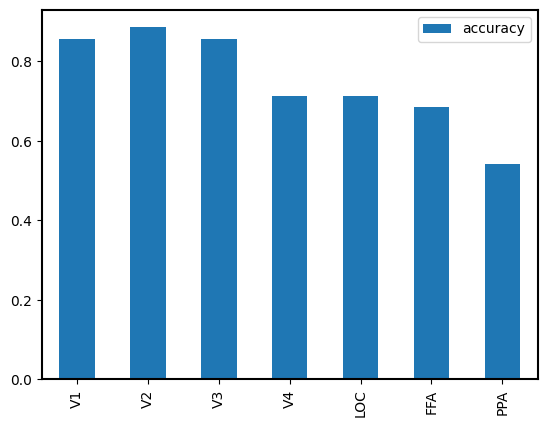

In [ ]:
roi_list = ['V1', 'V2', 'V3', 'V4', 'LOC', 'FFA', 'PPA']
accuracy = pd.DataFrame(index=roi_list, columns=['accuracy'])

for roi in roi_list:
    X, y = extract_data(roi, image_type='similar')

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5 ,random_state=42)

    # Creating and training the Logistic Regression model
    model = LogisticRegression(penalty='l2')
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and store in the accuracy DataFrame
    roi_accuracy = accuracy_score(y_test, y_pred)
    accuracy.loc[roi, 'accuracy'] = roi_accuracy

# Plot the decoding accuracy for different ROIs
accuracy.plot(kind='bar')

Hippocampus heliopolis (6).svg

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

<Axes: >

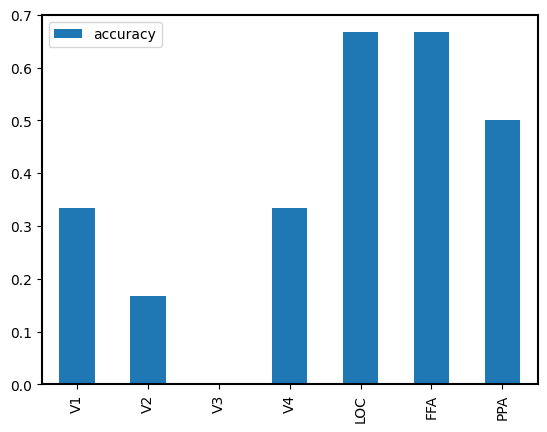

In [ ]:
roi_list = ['V1', 'V2', 'V3', 'V4', 'LOC', 'FFA', 'PPA']
accuracy = pd.DataFrame(index=roi_list, columns=['accuracy'])

for roi in roi_list:
    X, y = extract_data(roi, image_type='different')

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Creating and training the Logistic Regression model
    #model = LogisticRegression(penalty='l2', solver='liblinear')
    model = LogisticRegression(penalty='l2')
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and store in the accuracy DataFrame
    roi_accuracy = accuracy_score(y_test, y_pred)
    accuracy.loc[roi, 'accuracy'] = roi_accuracy

accuracy.plot(kind='bar')

Hippocampus heliopolis (7).svg

Hippocampus heliopolis (8).svg

Hippocampus heliopolis (9).svg

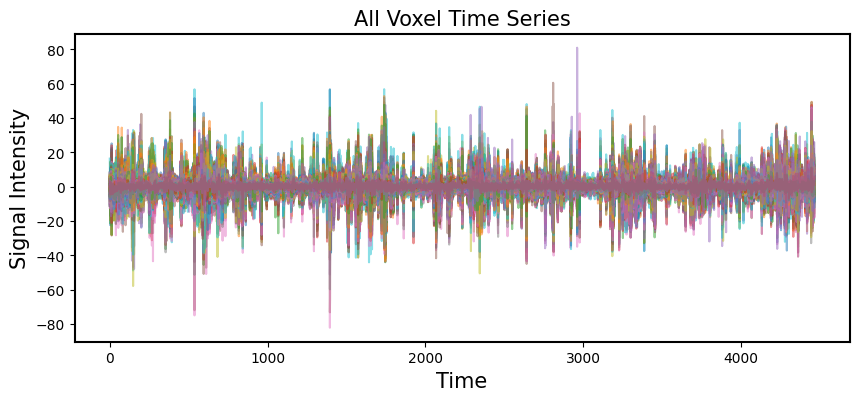

In [ ]:
# Load your HDF5 file
filename = 'data.h5'
voxel_data = bdpy.BData(filename)

# Assuming you want to load voxel data and corresponding metadata
voxel_data_key = 'VoxelData'  # Change this to the actual key for voxel data
run_key = 'Run'  # Change this to the actual key for run number

# Load voxel data and run information
voxel_data_array = voxel_data.select(voxel_data_key)
run_numbers = voxel_data.select(run_key)

# Choose a specific run for visualization (e.g., the first run)
selected_run = 1

# Get the indices of rows corresponding to the selected run
selected_run_indices = np.where(run_numbers == selected_run)[0]

# Extract voxel data for the selected run and all voxel indices
selected_voxel_data = voxel_data_array[selected_run_indices, :]

# Plot example: Display all voxel time series in a single plot
plt.figure(figsize=(10, 4))
plt.plot(selected_voxel_data.T, alpha=0.5)  # Plotting all voxel time series
plt.title('All Voxel Time Series'.format(selected_run))
plt.xlabel('Time')
plt.ylabel('Signal Intensity')
plt.show()


Hippocampus heliopolis (10).svg